<a href="https://colab.research.google.com/github/diegomera1/ActivitysIA/blob/main/Regresi%C3%B3n_Log%C3%ADstica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logísitica
---


La regresión logísitica es un modelo que puede predecir la probabilidad que tiene una variable binaria (que puede aceptar 2 valores) de pertenecer a una clase o a otra.  

Es por tanto un método utilizado para la clasificación categórica de variables, especialmente útil por su simplicidad e interpretabilidad

## Escenario del problema
---


Una empresa de coches ha sacado un nuevo modelo al mercado. Le ha preguntado a una red social quién ha
comprado el producto, recaudando el sexo, la edad y el salario de cada uno de ellos.
Ahora queremos construir un modelo que nos permita determinar con estos atributos si la persona comprará
el producto o no, para tomar medidas en función de la respuesta para que lo acabe comprando

In [5]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [16]:
# 2. Importar datos
datos = pd.read_csv('Compras.csv')
datos.head(10)

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
5,15728773,Hombre,27,58000,0
6,15598044,Mujer,27,84000,0
7,15694829,Mujer,32,150000,1
8,15600575,Hombre,25,33000,0
9,15727311,Mujer,35,65000,0


In [8]:
# 3. Crear variable y respuesta
X = datos.iloc[:,2:-1].values
y = datos['Compra'].values

In [9]:
# 4. Variables categóricas! --> Encode
'''
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()
X[:,0] = enconder.fit_transform(X[:,0])
'''
dataframe = pd.DataFrame(X)
dataframe.head()

,0,1
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [10]:
# 4. Separar en Entranamiento y Validación
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.25, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (300, 2)
La forma de y_train es:  (300,)
La forma de X_test es:  (100, 2)
La forma de y_test es:  (100,)


In [11]:
# 5. Escalar los datos
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926]])

In [12]:
# 6. Ajustar el Modelo
from sklearn.linear_model import LogisticRegression as LR
clasificador = LR(random_state=0)
clasificador.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [13]:
# 7. Hacer las predicciones
#y_fit = clasificador.predict(X_train)
y_pred = clasificador.predict(X_test)

In [14]:
# 8. Crear la Matriz de Confusión para evaluar la clasificación realizada
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[67,  1],
       [10, 22]])

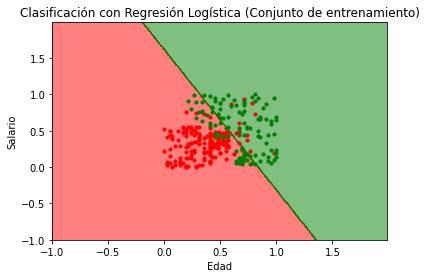

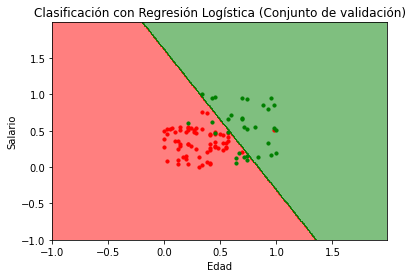

In [15]:
# 9. Visualizar los resultados
# 9.1 Conjunto de entramiento
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# 9.2 Conjunto de validación
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de validación)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# Conclusión
---
Hemos visto como la regresión logística establece una separación lineal en función de las probabilidades que tiene cada punto de pertenecer a una clase o a la otra.  

La línea de separación corresponde por tanto a aquellos puntos donde la probabilidad de pertenecer a cualquiera de las dos clases es del 50%.